In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported")

Libraries imported


In [124]:
health_df = pd.read_csv('Health_insurance.csv')
df  = health_df.copy()

In [125]:
print('numbers of rows are {} and columns are {}'.format(df.shape[0] , df.shape[1]))
df.info()

numbers of rows are 1338 and columns are 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observation:**

There are 7 features and 1338 entires, all non-null. Age, BMI, Children, and Charges are numerical features, and of them, Children is a numerical categorical feature. Sex (or more appropriately, Gender), Smoker, and Region, are all string categorical features.



In [126]:
print(df.isna().sum().sort_values(ascending = False))
print('duplicate values in df' ,df.duplicated().sum() )
print('duplicates dropped')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
duplicate values in df 1
duplicates dropped


In [127]:
#create counts of dfa for plotting categorical variables
gender = np.unique(df['sex'], return_counts=True)
smoker = np.unique(df['smoker'], return_counts=True)
region = np.unique(df['region'], return_counts=True)
print('gender = {}\n'.format(gender))
print('smoker = {}\n'.format(smoker))
print('region = {}\n'.format(region))

gender = (array(['female', 'male'], dtype=object), array([662, 676], dtype=int64))

smoker = (array(['no', 'yes'], dtype=object), array([1064,  274], dtype=int64))

region = (array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object), array([324, 325, 364, 325], dtype=int64))



### Spread Sheet of Data

In [128]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

### Countplot

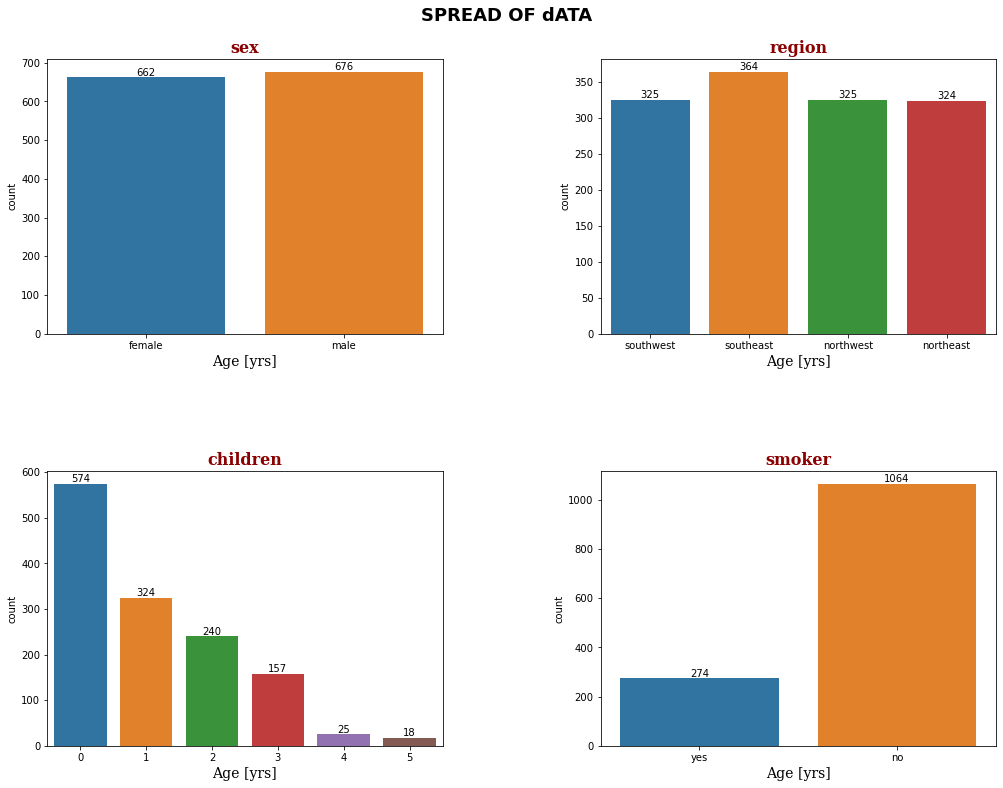

In [139]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[17,12])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(['sex' ,'region' , 'children' ,'smoker']):
    a = fig.add_subplot(2, 2, i+1) 
    a=sns.countplot(x = df[col] , ax=a)
    a.set_title(col , fontdict=axtitle_dict)
    a.set_xlabel('Age [yrs]', fontdict=axlab_dict)
    a.bar_label(a.containers[0])
#     a.legend(fontsize=10)

### BarPlot

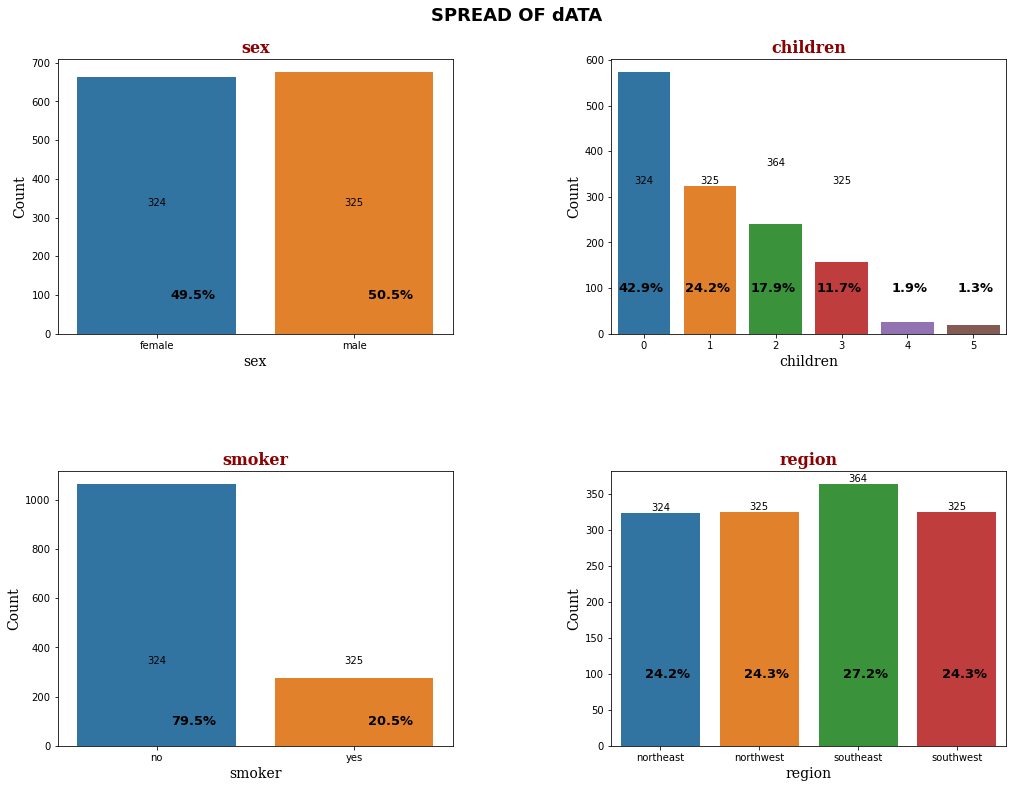

In [146]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[17,12])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for j ,columns in enumerate(['sex' ,'children' ,'smoker' ,'region']):
	a = fig.add_subplot(2, 2, j+1) 
	input = np.unique(df[columns] , return_counts = True)
	col= 'input'
	a =sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')) , ax=a)
#     a=sns.countplot(x = df[col] , ax=a)
	for i in range(len(eval(f'{col}{[1]}'))):
		a.text(0.3+ i, 100, '{}%' .format(str(round(eval(f'{col}{[1]}{[i]}')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
# ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
	a.set_title(f'{columns}', fontdict=axtitle_dict)
	a.set_xlabel(f'{columns}', fontdict=axlab_dict)
	a.set_ylabel('Count', fontdict=axlab_dict)
	a.bar_label(ax1.containers[0])

### Displot

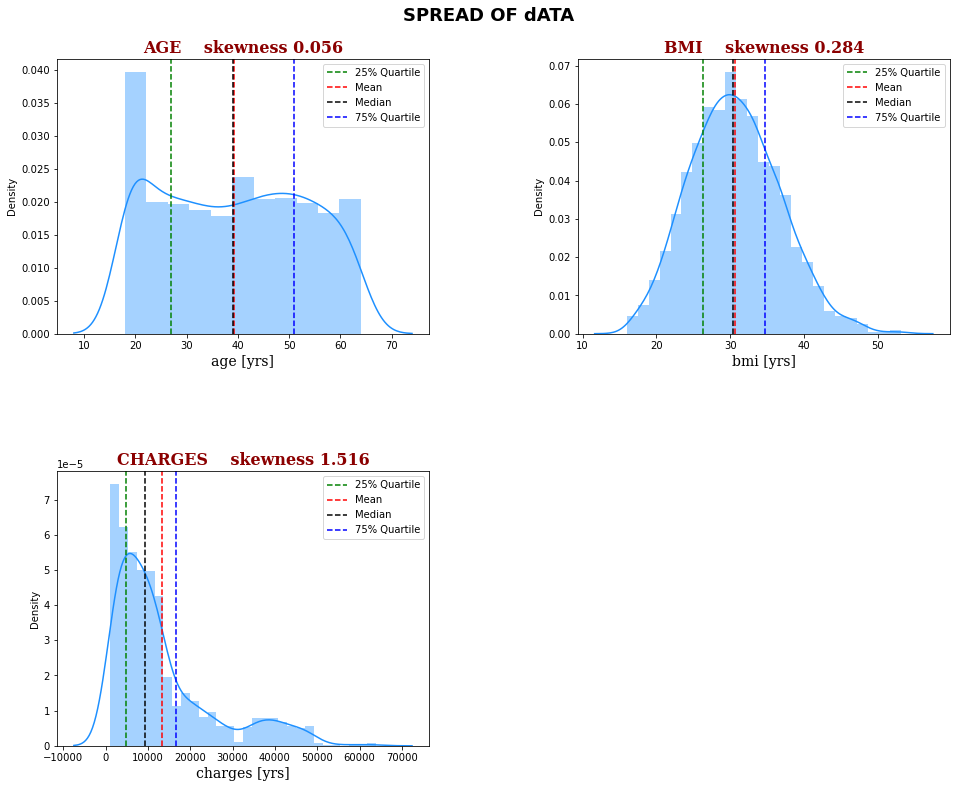

In [163]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(['age' ,'bmi' ,'charges']):
    ax0 = fig.add_subplot(2, 2, i+1)
    ax0 = sns.distplot(df[col],  color='dodgerblue')
    ax0.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax0.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax0.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax0.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
#     ax0.text(7000 , 3e-5 ,'skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax0.set_xlabel(f'{col} [yrs]', fontdict=axlab_dict)
    ax0.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict);
    ax0.legend(fontsize=10)

**Observation:**

- The age feature appears to be non-skewed but platykurtic, deviating from a normal distrubtion.

- Gender appears to have a near 50/50 spread as would be expected.

- BMI appears to be normally distributed (both non-skewed and mesokurtic).

- Number of children appears to be reasonably spread.

- A majority of the population are non-smokers, with about 20% smokers.

- There is a close to even spread of records across regions.

- Charges appear to be heavily positively skewed, deviating from a normal distribution.

### BOX plot

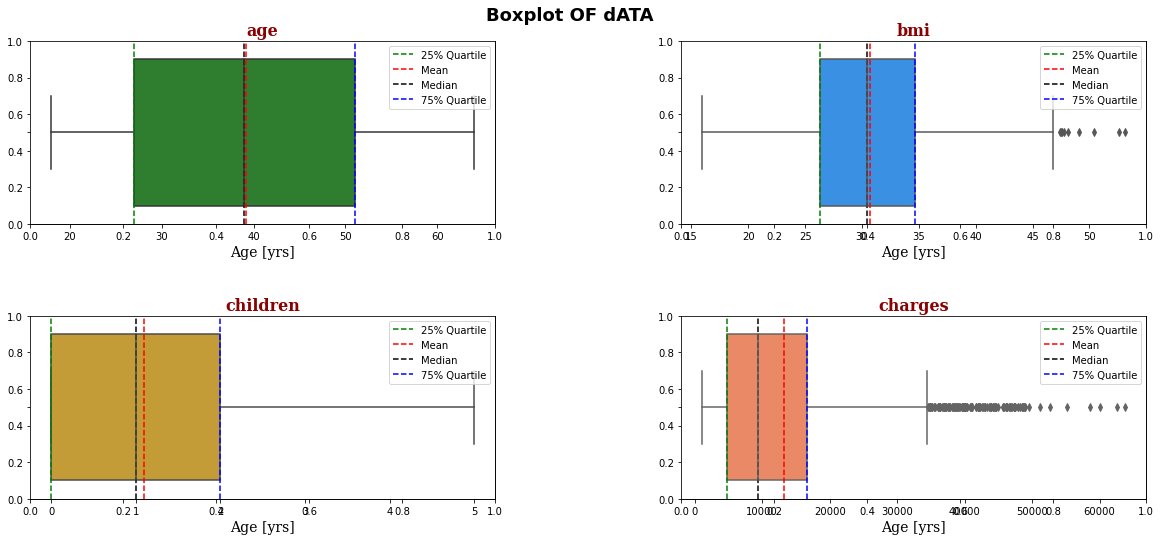

In [181]:
#create figure with 3 x 3 grid of subplots
x = ['age', 'bmi', 'children', 'charges'];
colors = ['forestgreen','dodgerblue','goldenrod', 'coral'];
fig = plt.figure(figsize=[20,8])
fig.suptitle('Boxplot OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
grid = plt.GridSpec(6, 1, wspace=0.3, hspace=1.2);
for i ,col in enumerate(x):
    ax0 = fig.add_subplot(2, 2, i+1)
    ax0 = fig.add_subplot(2, 2, i+1)
    ax0=sns.boxplot(df[col ], ax=ax0, color=colors[i]) 
    ax0.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax0.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax0.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax0.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')

	#a=sns.countplot(x = df[col] , ax=a)
	#a.bar_label(a.containers[0]) 
    ax0.set_title(col , fontdict=axtitle_dict)
    ax0.set_xlabel('Age [yrs]', fontdict=axlab_dict)
    ax0.legend(fontsize=10)

Observation:

Mean age of claimants is approximately 39 years old and all adults, from the age of 16 to 64 years old.

The mean BMI of claimants is obese (>30) and the IQR falls between overweight and obese. Outliers appear in the high end of extreme obesity.

Median population of claimants has one child and IQR is between 0 to 2 children. There does not appear to be any outliers in this distribution.

Mean claim payment is about 13000, with IQR between approximately 5000 to 17000. There are some outliers in the higher amount claims.

### Dummies

In [183]:
#create dummies of categorical features so that correlation may be analyzed
dum_df= pd.get_dummies(df, prefix='Gen', columns=['sex'])
dum_df= pd.get_dummies(dum_df, prefix='Smok', columns=['smoker'])
dum_df= pd.get_dummies(dum_df, prefix='Reg', columns=['region'])
dum_df.head(10)

,age,bmi,children,charges,Gen_female,Gen_male,Smok_no,Smok_yes,Reg_northeast,Reg_northwest,Reg_southeast,Reg_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


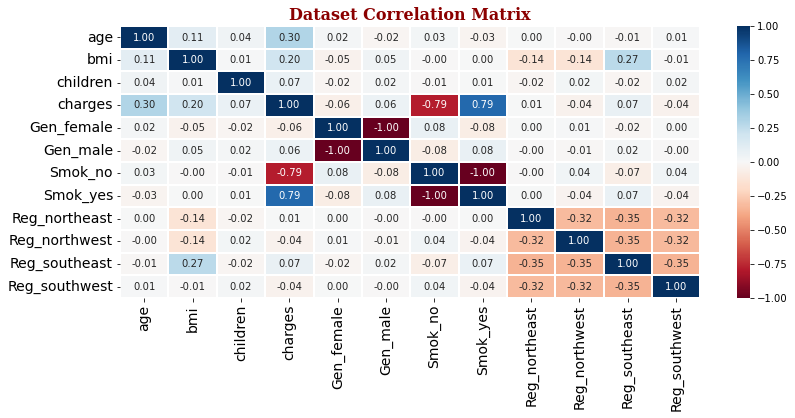

In [191]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(dum_df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap="RdBu")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

### Scatterplot

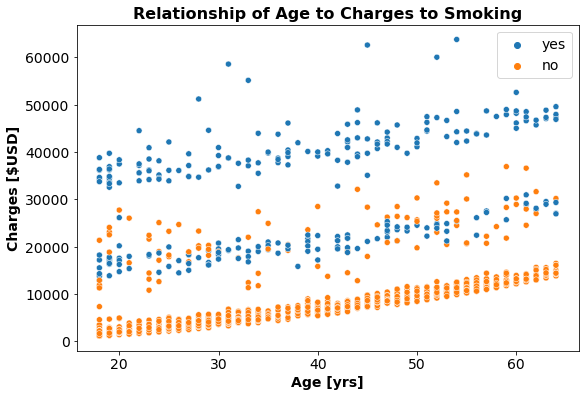

In [198]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.scatterplot(data=df, x = 'age', y = 'charges', hue='smoker');
plt.xlabel('Age [yrs]', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of Age to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14); 

Observation:

     The figure above demonstrates that there are two groups of claimants within the smoker and non-smoker groups, with one sub-group generating higher dollar amount claims. The dataset, however, does not appear to have any features that shed light on this subgrouping

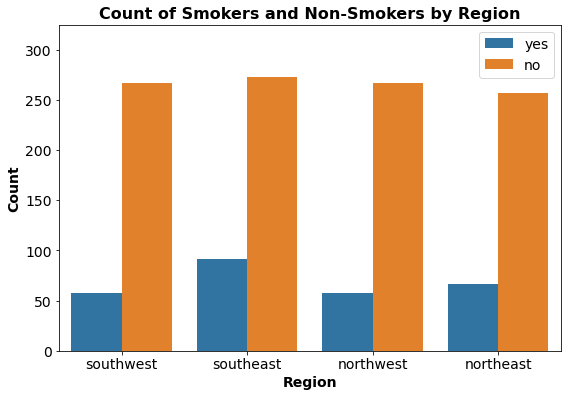

In [200]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.countplot(data=df, x = 'region', hue = 'smoker');
plt.xlabel('Region', fontsize='14', fontweight='bold');
plt.ylabel('Count', fontsize='14', fontweight='bold');
plt.title('Count of Smokers and Non-Smokers by Region', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
ax0.set(ylim=(0, 325)); 
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

Observation:

     There appears to be some variability in the count of smokers by region. This will be investigated further with hypothesis testing.

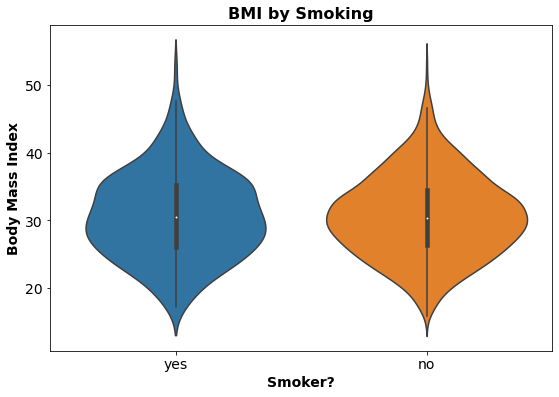

In [201]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.violinplot(data=df, y = 'bmi', x = 'smoker');
plt.xlabel('Smoker?', fontsize='14', fontweight='bold');
plt.ylabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI by Smoking', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14); 

Observation:

     Based upon the violinplots above, it appears that smoking may lead to higher rates of obesity.

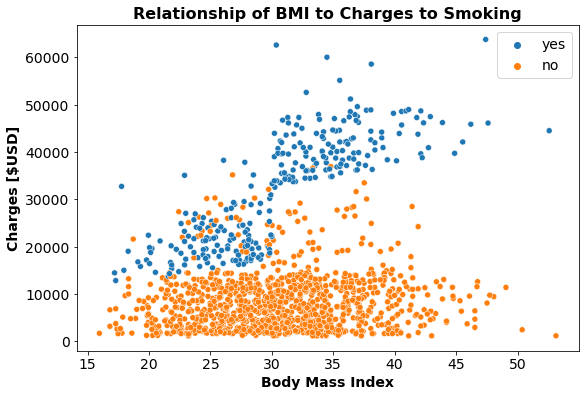

In [203]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.scatterplot(data=df, y = 'charges', x = 'bmi', hue='smoker');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

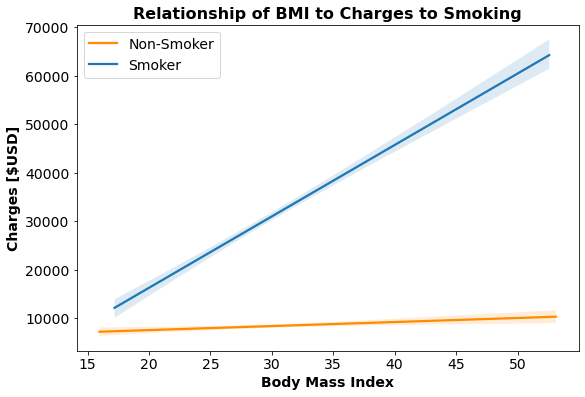

In [204]:
fig1 = plt.figure(figsize=[9,6]);
sns.regplot(y = df.loc[df['smoker']=='no','charges'], x = df.loc[df['smoker']=='no','bmi'], scatter=False, label='Non-Smoker', color='darkorange');
sns.regplot(y = df.loc[df['smoker']=='yes','charges'], x = df.loc[df['smoker']=='yes','bmi'], scatter=False, label='Smoker', color='tab:blue');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

Observation:

     Smoking and Obesity are directly proportional to the dollar amount of medical insurance claims. All things equal, a smoker with a higher BMI will cost more to insure than a non-smoker with the same BMI.

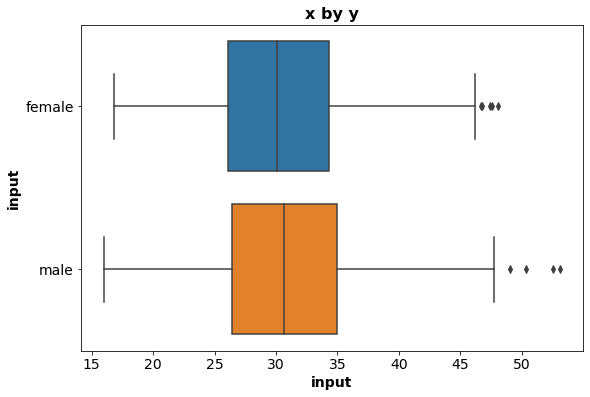

In [208]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.boxplot(data = df, y = 'sex', x = 'bmi' );
plt.ylabel('input', fontsize='14', fontweight='bold');
plt.xlabel('input', fontsize='14', fontweight='bold');
plt.title('x by y', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

Observation:

     The boxplots above demonstrate a possible right-shift in the distribution of male BMI scores compared to that of females. this will be hyporthesis tested below.